# Influence of Weather on the bixi system

The purpose of this notebook is to make correlation and draw conclusion between weather factors and bike use. We'll try to suppress other factors (such as increasing popularity of bikeshare, increasing number of bike, ...) as much as possible.

# Increasing popularity of the bixi system

Let's visualise the evolution of the utilisation of the bike. In the following cells, we import the data and create a useful dataset for the analysis.

In [1]:
%matplotlib inline
import re
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from requests import get
from bs4 import BeautifulSoup
from matplotlib.ticker import MaxNLocator

In [2]:
# Do not run this cell

# loads the combined dataset
data = pd.read_pickle("../combined_data")
data.head()

,start_date,start_station_code,end_date,end_station_code,duration_sec,is_member,latitude_start,longitude_start,latitude_end,longitude_end,year,month,start_day,start_hour,end_day,end_hour,distance
0,2014-04-15 00:01:00,6209,2014-04-15 00:18:00,6436,1061,1,45.512520,-73.570620,45.486452,-73.595234,2014,4,15,0,15,0,3.475949
1,2014-04-15 00:01:00,6214,2014-04-15 00:11:00,6248,615,1,45.517350,-73.569060,45.518593,-73.581566,2014,4,15,0,15,0,0.984131
2,2014-04-15 00:01:00,6164,2014-04-15 00:18:00,6216,1031,1,45.532955,-73.584194,45.514960,-73.585030,2014,4,15,0,15,0,2.002019
3,2014-04-15 00:01:00,6214,2014-04-15 00:24:00,6082,1382,1,45.517350,-73.569060,45.550613,-73.582883,2014,4,15,0,15,0,3.852206
4,2014-04-15 00:02:00,6149,2014-04-15 00:08:00,6265,347,1,45.538670,-73.569360,45.539259,-73.577338,2014,4,15,0,15,0,0.624798


### Creation of a daily dataframe

In [3]:
# Do not run this cell

# We keep only date, using the start date as the reference date.
df = data[['year','month','start_day']]
df.year = df.year.map(str) + '-' + df.month.map(str) + '-' + df.start_day.map(str)
df = df[['year']]

# Conversion of date to datetime
df['datetime'] = df.apply(lambda row: datetime.datetime.strptime(row['year'], '%Y-%m-%d'), axis=1)

df = df[['datetime']]
df = df.rename(columns={'datetime': 'date'})

#Number of biketravel per day
Daily_BikeCount = df.groupby(['date']).size().reset_index(name='count')

C:\Users\Ariane Acer\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,date
0,2014-04-15
1,2014-04-15
2,2014-04-15
3,2014-04-15
4,2014-04-15


Some dates are missing, as bike service is closed from the 1rst of October to the 15th of April.
We fill the hole with 0 by creating another dataset named calendar.

In [2]:
# create an array of 1995 dates starting at '2014-04-15', one per day
rng = pd.date_range('2014-04-15', periods=1995, freq='D')
calendar = pd.DataFrame({ 'date': rng, 'Count' : 0 }) 
calendar

,date,Count
0,2014-04-15,0
1,2014-04-16,0
2,2014-04-17,0
3,2014-04-18,0
4,2014-04-19,0
...,...,...
1990,2019-09-26,0
1991,2019-09-27,0
1992,2019-09-28,0
1993,2019-09-29,0


In [6]:
# Do not run this cell

# We merge the two dataframe in order to include missing date
Daily_BikeTravel = pd.merge(Daily_BikeCount, calendar, how='outer', on=None, left_on='date', right_on='date',
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

Daily_BikeTravel.drop(['Count'],axis='columns', inplace=True)

# We fill the missing values
Daily_BikeTravel = Daily_BikeTravel.fillna(0)

# save the file to pickle because it takes too much time
Daily_BikeTravel.to_pickle("../DailyBikeTravel") 

In [3]:
Daily_BikeTravel = pd.read_pickle("../DailyBikeTravel")
Daily_BikeTravel.head()

,date,count
0,2014-04-15,1577.0
1,2014-04-16,3180.0
2,2014-04-17,5852.0
3,2014-04-18,5325.0
4,2014-04-19,6031.0


We plot the evolution of bike use over time.

C:\Users\Ariane Acer\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'number of 10^4 bike travel of the day ')

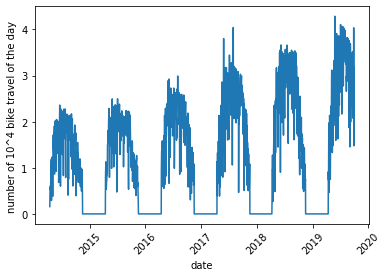

In [4]:
plt.plot(Daily_BikeTravel['date'],Daily_BikeTravel['count']/10000)
plt.xticks(rotation = 45);

axes = plt.gca()
axes.set_xlabel('date')
axes.set_ylabel('number of 10^4 bike travel of the day ')

### Creation of a monthly dataset

The same plot can be done considering only month.

In [7]:
# Do not run this cell

# Number of biketravel per month
df = data[['year','month','start_day']]
df.year = df.year.map(str) + '-' + df.month.map(str)
df = df[['year']]

# Conversion to datetime
df['datetime'] = df.apply(lambda row: datetime.datetime.strptime(row['year'], '%Y-%m'), axis=1)

df = df[['datetime']]
df = df.rename(columns={'datetime': 'date'})

# Number of bike per month
Monthly_BikeCount = df.groupby(['date']).size().reset_index(name='count')

C:\Users\Ariane Acer\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [5]:
# create an array of 66 dates starting at '2014-04', one per month
month_rng = pd.date_range('2014-04', periods=66, freq='MS')
month_calendar = pd.DataFrame({ 'date': month_rng, 'Count' : 0 }) 

In [10]:
# Do not run this cell

# We merge the two dataframe in order to include missing date
Monthly_BikeTravel = pd.merge(Monthly_BikeCount, month_calendar, how='outer', on=None, left_on='date', 
                              right_on='date', left_index=False, right_index=False, sort=True, 
                              suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)

Monthly_BikeTravel.drop(['Count'],axis='columns', inplace=True)

# We fill the missing values
Monthly_BikeTravel = Monthly_BikeTravel.fillna(0)

# save the file to pickle because it takes too much time
Monthly_BikeTravel.to_pickle("../MonthlyBikeTravel")

In [6]:
Monthly_BikeTravel = pd.read_pickle("../MonthlyBikeTravel")
Monthly_BikeTravel.head()

,date,count
0,2014-04-01,108264.0
1,2014-05-01,455261.0
2,2014-06-01,525863.0
3,2014-07-01,569352.0
4,2014-08-01,556780.0


Text(0, 0.5, 'number of 10^4 bike travel of the month ')

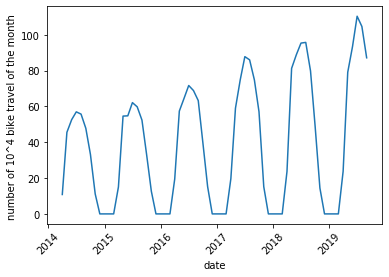

In [7]:
plt.plot(Monthly_BikeTravel['date'],Monthly_BikeTravel['count']/10000)
plt.xticks(rotation = 45);

axes = plt.gca()
axes.set_xlabel('date')
axes.set_ylabel('number of 10^4 bike travel of the month ')

We clearly see the effect of the cycle of season.
Bikes are not used between november and april.
Also as expected, bikes are more and more used.

## Normalization of the data

To try to suppress this tendency, we normalize the number of bike travel by the number of bike travel per year.

In [13]:
# Do not run this cell

# Number of biketravel per year
df = data[['year','month','start_day']]
df.year = df.year.map(str)
df = df[['year']]

# Conversion to datetime
df['datetime'] = df.apply(lambda row: datetime.datetime.strptime(row['year'], '%Y'), axis=1)

df = df[['datetime']]
df = df.rename(columns={'datetime': 'date'})

# Number of bike per year
Annual_BikeTravel = df.groupby(['date']).size().reset_index(name='count')

# save the file to pickle because it takes too much time
Annual_BikeTravel.to_pickle("../Annual_BikeTravel") # where to save it usually as a .plk

In [8]:
Annual_BikeTravel = pd.read_pickle("../Annual_BikeTravel")
Annual_BikeTravel

,date,count
0,2014-01-01,3136276
1,2015-01-01,3443883
2,2016-01-01,4000080
3,2017-01-01,4740357
4,2018-01-01,5277541
5,2019-01-01,4980650


In [9]:
year_2014 = Monthly_BikeTravel['date'].dt.year == 2014
data_2014 = Monthly_BikeTravel[year_2014]
data_2014['count'] = data_2014['count'].apply(lambda x: x/3136276)
data_2014 = data_2014.rename(columns={'count': 'normalized_count'})

year_2015 = Monthly_BikeTravel['date'].dt.year == 2015
data_2015 = Monthly_BikeTravel[year_2015]
data_2015['count'] = data_2015['count'].apply(lambda x: x/3443883)
data_2015 = data_2015.rename(columns={'count': 'normalized_count'})

year_2016 = Monthly_BikeTravel['date'].dt.year == 2016
data_2016 = Monthly_BikeTravel[year_2016]
data_2016['count'] = data_2016['count'].apply(lambda x: x/4000080)
data_2016 = data_2016.rename(columns={'count': 'normalized_count'})

year_2017 = Monthly_BikeTravel['date'].dt.year == 2017
data_2017 = Monthly_BikeTravel[year_2017]
data_2017['count'] = data_2017['count'].apply(lambda x: x/4740357)
data_2017 = data_2017.rename(columns={'count': 'normalized_count'})

year_2018 = Monthly_BikeTravel['date'].dt.year == 2018
data_2018 = Monthly_BikeTravel[year_2018]
data_2018['count'] = data_2018['count'].apply(lambda x: x/5277541)
data_2018 = data_2018.rename(columns={'count': 'normalized_count'})

year_2019 = Monthly_BikeTravel['date'].dt.year == 2019
data_2019 = Monthly_BikeTravel[year_2019]
data_2019['count'] = data_2019['count'].apply(lambda x: x/4980650)
data_2019 = data_2019.rename(columns={'count': 'normalized_count'})

C:\Users\Ariane Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ariane Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Ariane Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [10]:
Normalized_MonthlyBike = pd.concat([data_2014,data_2015,data_2016,data_2017,data_2018,data_2019])

Normalized_MonthlyBike.head()

,date,normalized_count
0,2014-04-01,0.034520
1,2014-05-01,0.145160
2,2014-06-01,0.167671
3,2014-07-01,0.181538
4,2014-08-01,0.177529


Text(0, 0.5, 'bike travel normalized by year')

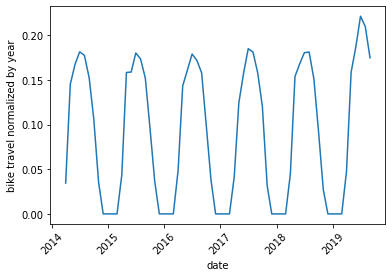

In [11]:
plt.plot(Normalized_MonthlyBike['date'],Normalized_MonthlyBike['normalized_count'])
plt.xticks(rotation = 45);

axes = plt.gca()
axes.set_xlabel('date')
axes.set_ylabel('bike travel normalized by year')

Except 2019, we see that the amplitude is approximately the same for each year. 

We use the same trick to have daily data that could be used for daily analysis.

In [12]:
year_2014 = Daily_BikeTravel['date'].dt.year == 2014
data_2014 = Daily_BikeTravel[year_2014]
data_2014['count'] = data_2014['count'].apply(lambda x: x/3136276)
data_2014 = data_2014.rename(columns={'count': 'normalized_count'})

year_2015 = Daily_BikeTravel['date'].dt.year == 2015
data_2015 = Daily_BikeTravel[year_2015]
data_2015['count'] = data_2015['count'].apply(lambda x: x/3443883)
data_2015 = data_2015.rename(columns={'count': 'normalized_count'})

year_2016 = Daily_BikeTravel['date'].dt.year == 2016
data_2016 = Daily_BikeTravel[year_2016]
data_2016['count'] = data_2016['count'].apply(lambda x: x/4000080)
data_2016 = data_2016.rename(columns={'count': 'normalized_count'})

year_2017 = Daily_BikeTravel['date'].dt.year == 2017
data_2017 = Daily_BikeTravel[year_2017]
data_2017['count'] = data_2017['count'].apply(lambda x: x/4740357)
data_2017 = data_2017.rename(columns={'count': 'normalized_count'})

year_2018 = Daily_BikeTravel['date'].dt.year == 2018
data_2018 = Daily_BikeTravel[year_2018]
data_2018['count'] = data_2018['count'].apply(lambda x: x/5277541)
data_2018 = data_2018.rename(columns={'count': 'normalized_count'})

year_2019 = Daily_BikeTravel['date'].dt.year == 2019
data_2019 = Daily_BikeTravel[year_2019]
data_2019['count'] = data_2019['count'].apply(lambda x: x/4980650)
data_2019 = data_2019.rename(columns={'count': 'normalized_count'})

C:\Users\Ariane Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ariane Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Ariane Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [13]:
Normalized_DailyBike = pd.concat([data_2014,data_2015,data_2016,data_2017,data_2018,data_2019])

Normalized_DailyBike.head()

,date,normalized_count
0,2014-04-15,0.000503
1,2014-04-16,0.001014
2,2014-04-17,0.001866
3,2014-04-18,0.001698
4,2014-04-19,0.001923


Text(0, 0.5, 'bike travel normalized by year')

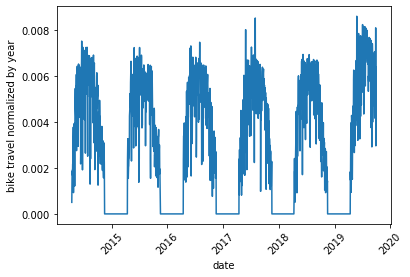

In [14]:
plt.plot(Normalized_DailyBike['date'],Normalized_DailyBike['normalized_count'])
plt.xticks(rotation = 45);

axes = plt.gca()
axes.set_xlabel('date')
axes.set_ylabel('bike travel normalized by year')

This dataframe will be used to make daily analysis.

# The weather dataset

We want to analyze the influence of weather on the use of the bikeshare system.

## Cleaning of the dataset

In [15]:
weather_2014 = pd.read_csv(r"WeatherData\2014.csv",sep = ',')
weather_2015 = pd.read_csv(r"WeatherData\2015.csv",sep = ',')
weather_2016 = pd.read_csv(r"WeatherData\2016.csv",sep = ',')
weather_2017 = pd.read_csv(r"WeatherData\2017.csv",sep = ',')
weather_2018 = pd.read_csv(r"WeatherData\2018.csv",sep = ',')
weather_2019 = pd.read_csv(r"WeatherData\2019.csv",sep = ',')

data = pd.concat([weather_2014,weather_2015,weather_2016,weather_2017,weather_2018,weather_2019])

data.head()

,Longitude (x),Latitude (y),Nom de la Station,ID climatologique,Date/Heure,Année,Mois,Jour,Qualité des Données,Temp max.(°C),...,Neige tot. (cm),Neige tot. Indicateur,Précip. tot. (mm),Précip. tot. Indicateur,Neige au sol (cm),Neige au sol Indicateur,Dir. raf. max. (10s deg),Dir. raf. max. Indicateur,Vit. raf. max. (km/h),Vit. raf. max. Indicateur
0,"-73,58","45,50",MCTAVISH,7024745,2014-01-01,2014,1,1,NaN,"-15,2",...,NaN,M,"0,0",NaN,NaN,NaN,NaN,NaN,<31,NaN
1,"-73,58","45,50",MCTAVISH,7024745,2014-01-02,2014,1,2,NaN,"-22,3",...,NaN,M,"0,0",NaN,NaN,NaN,3.0,NaN,37,NaN
2,"-73,58","45,50",MCTAVISH,7024745,2014-01-03,2014,1,3,NaN,"-19,0",...,NaN,M,"1,0",NaN,NaN,NaN,NaN,NaN,<31,NaN
3,"-73,58","45,50",MCTAVISH,7024745,2014-01-04,2014,1,4,NaN,"-6,6",...,NaN,M,"0,0",NaN,NaN,NaN,NaN,NaN,<31,NaN
4,"-73,58","45,50",MCTAVISH,7024745,2014-01-05,2014,1,5,NaN,"0,2",...,NaN,M,"8,0",NaN,NaN,NaN,NaN,NaN,<31,NaN


In [16]:
# Selection of useful data
df_weather = data[['Date/Heure','Temp moy.(°C)','Précip. tot. (mm)', 'Neige au sol (cm)', 'Vit. raf. max. (km/h)']]

# Conversion to datetime
df_weather['datetime'] = df_weather.apply(lambda row: datetime.datetime.strptime(row['Date/Heure'], '%Y-%m-%d'), 
                        axis=1)
df_weather = df_weather.rename(columns={'datetime': 'Date'})
df_weather.drop(['Date/Heure'],axis='columns', inplace=True)

df_weather.head()

C:\Users\Ariane Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Temp moy.(°C),Précip. tot. (mm),Neige au sol (cm),Vit. raf. max. (km/h),Date
0,"-19,6","0,0",NaN,<31,2014-01-01
1,"-24,9","0,0",NaN,37,2014-01-02
2,"-21,3","1,0",NaN,<31,2014-01-03
3,"-14,0","0,0",NaN,<31,2014-01-04
4,"-5,2","8,0",NaN,<31,2014-01-05


In [17]:
df_weather.dtypes

Temp moy.(°C)                    object
Précip. tot. (mm)                object
Neige au sol (cm)               float64
Vit. raf. max. (km/h)            object
Date                     datetime64[ns]
dtype: object

Each column will be handle individually to get rid off values we can't use or convert strings into float.

In [18]:
# Temperature care 

# Conversion of string into float
df_temp = df_weather [['Date','Temp moy.(°C)']]
df_temp = df_temp.dropna()

# This conversion function need all NaN to be suppressed
df_temp['Mean temp (°C)'] = df_temp.apply(lambda row: float(row['Temp moy.(°C)'].replace(',','.')), axis=1)
df_temp.drop(['Temp moy.(°C)'],axis='columns', inplace=True)


# Put again the missing date
df_temp = pd.merge(df_temp, calendar, how='outer', on=None, left_on='Date', right_on='date',
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

df_temp.drop(['Count'],axis='columns', inplace=True)
df_temp.drop(['date'],axis='columns', inplace=True)

# Fill the missing value with value of the day before
#df_temp.fillna(method='pad')

df_temp.head()

,Date,Mean temp (°C)
0,2014-01-01,-19.6
1,2014-01-02,-24.9
2,2014-01-03,-21.3
3,2014-01-04,-14.0
4,2014-01-05,-5.2


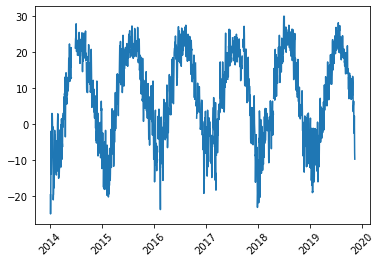

In [19]:
# Visualisation of data

plt.plot(df_temp['Date'],df_temp['Mean temp (°C)'])
plt.xticks(rotation = 45);

In [20]:
# same for precipitation

# Conversion of string into float
df_rain = df_weather [['Date','Précip. tot. (mm)']]
df_rain = df_rain.dropna()

# This conversion function need all NaN to be suppressed
df_rain['Tot precip (mm)'] = df_rain.apply(lambda row: float(row['Précip. tot. (mm)'].replace(',','.')), axis=1)
df_rain.drop(['Précip. tot. (mm)'],axis='columns', inplace=True)

# Put again the missing date
df_rain = pd.merge(df_rain, calendar, how='outer', on=None, left_on='Date', right_on='date',
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

df_rain.drop(['Count'],axis='columns', inplace=True)
df_rain.drop(['date'],axis='columns', inplace=True)

# Fill the missing value with value of the day before
#df_rain.fillna(method='pad')

df_rain.head()

,Date,Tot precip (mm)
0,2014-01-01,0.0
1,2014-01-02,0.0
2,2014-01-03,1.0
3,2014-01-04,0.0
4,2014-01-05,8.0


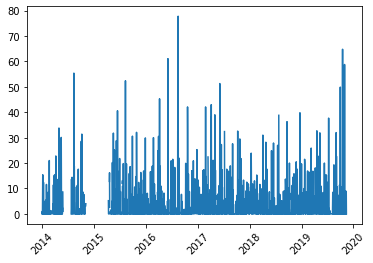

In [21]:
# Visualisation of data

plt.plot(df_rain['Date'],df_rain['Tot precip (mm)'])
plt.xticks(rotation = 45);

In [22]:
# snow type is already float
df_snow = df_weather [['Date','Neige au sol (cm)']]

# change le nom
df_snow = df_snow.rename(columns={'Neige au sol (cm)': 'Snow on ground (cm)'})

# Fill the missing value with 0
df_snow = df_snow.fillna(0)

df_snow

,Date,Snow on ground (cm)
0,2014-01-01,0.0
1,2014-01-02,0.0
2,2014-01-03,0.0
3,2014-01-04,0.0
4,2014-01-05,0.0
...,...,...
360,2019-12-27,0.0
361,2019-12-28,0.0
362,2019-12-29,0.0
363,2019-12-30,0.0


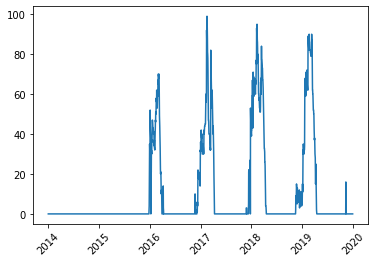

In [23]:
# Visualisation of data

plt.plot(df_snow['Date'],df_snow['Snow on ground (cm)'])
plt.xticks(rotation = 45);

It seems that the dataset do not contain snow data before 2016. We'll have to keep it in mind and to not uses these data before 2016.

In [24]:
# fix the wind max speed
df_wind = df_weather [['Date','Vit. raf. max. (km/h)']]
df_wind.head()

,Date,Vit. raf. max. (km/h)
0,2014-01-01,<31
1,2014-01-02,37
2,2014-01-03,<31
3,2014-01-04,<31
4,2014-01-05,<31


In [25]:
Wind_Type = df_wind.groupby(['Vit. raf. max. (km/h)']).size().reset_index(name='count')
Wind_Type.head()

,Vit. raf. max. (km/h),count
0,31,15
1,32,7
2,33,8
3,34,15
4,35,3


We do not dispose of wind data below 31 km/h.
We'll drop rows containing this value to keep only quantitative data.

In [26]:
# We drop rows with '<31'
df_wind = df_wind[df_wind['Vit. raf. max. (km/h)'] != '<31']
df_wind = df_wind.dropna()

# This conversion function need all NaN to be suppressed
df_wind['Wind max speed (km/h)'] = df_wind.apply(lambda row: float(row['Vit. raf. max. (km/h)']), axis=1)
df_wind.drop(['Vit. raf. max. (km/h)'],axis='columns', inplace = True)

df_wind

,Date,Wind max speed (km/h)
1,2014-01-02,37.0
5,2014-01-06,44.0
6,2014-01-07,43.0
7,2014-01-08,32.0
10,2014-01-11,32.0
...,...,...
303,2019-10-31,34.0
304,2019-11-01,58.0
309,2019-11-06,31.0
314,2019-11-11,32.0


In [27]:
# Put again the missing date
df_wind = pd.merge(df_wind, calendar, how='outer', on=None, left_on='Date', right_on='date',
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

df_wind.drop(['Count'],axis='columns', inplace = True)
df_wind.drop(['date'],axis='columns', inplace = True)

df_wind

,Date,Wind max speed (km/h)
0,2014-01-02,37.0
1,2014-01-06,44.0
2,2014-01-07,43.0
3,2014-01-08,32.0
4,2014-01-11,32.0
...,...,...
2038,2019-10-31,34.0
2039,2019-11-01,58.0
2040,2019-11-06,31.0
2041,2019-11-11,32.0


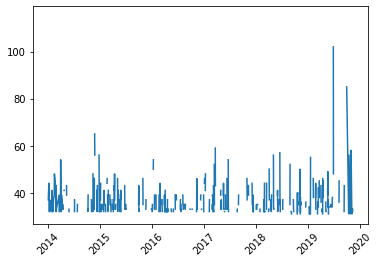

In [28]:
# Visualisation of data

plt.plot(df_wind['Date'],df_wind['Wind max speed (km/h)'])
plt.xticks(rotation = 45);

In [83]:
# Creation of the cleaned weather dataframe

weather_TempRain = pd.merge(df_temp, df_rain, how='inner', on=None, left_on='Date', right_on='Date',
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

weather_TempRain = weather_TempRain.dropna()

weather_withoutWind = pd.merge(weather_TempRain, df_snow, how='outer', on=None, left_on='Date', right_on='Date',
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

weather_withoutWind = weather_withoutWind.dropna()

cleaned_weather = pd.merge(weather_withoutWind, df_wind, how='outer', on=None, left_on='Date', right_on='Date',
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

cleaned_weather = cleaned_weather.dropna(subset=['Date'])

cleaned_weather.head()

,Date,Mean temp (°C),Tot precip (mm),Snow on ground (cm),Wind max speed (km/h)
1427,2014-01-01,-19.6,0.0,0.0,NaN
1428,2014-01-02,-24.9,0.0,0.0,37.0
1429,2014-01-03,-21.3,1.0,0.0,NaN
1430,2014-01-04,-14.0,0.0,0.0,NaN
1431,2014-01-05,-5.2,8.0,0.0,NaN


Now we should merge this last dataframe with the bike use data.

In [33]:
total_dataset = pd.merge(cleaned_weather, Normalized_DailyBike, how='outer', on=None, left_on='Date', 
                         right_on='date', left_index=False, right_index=False, sort=True, suffixes=('_x', '_y'), 
                         copy=True, indicator=False, validate=None)

total_dataset = total_dataset.dropna(subset=['normalized_count'])

total_dataset.drop(['date'],axis='columns', inplace = True)

total_dataset.head()

,Date,Mean temp (°C),Tot precip (mm),Snow on ground (cm),Wind max speed (km/h),normalized_count
94,2014-04-15,5.7,13.6,0.0,33.0,0.000503
95,2014-04-16,-3.5,0.0,0.0,33.0,0.001014
96,2014-04-17,2.6,0.0,0.0,NaN,0.001866
97,2014-04-18,6.3,0.0,0.0,NaN,0.001698
98,2014-04-19,7.2,1.0,0.0,35.0,0.001923


For the next of the code, we don't want to take into account month where the bixi system is closed. So we drop the month where it is the case. Also we do want a dataset with date beyond 2016 in order to have relevent snow values.

In [52]:
total_dataset = total_dataset[total_dataset['normalized_count'] != 0]

In [84]:
year_2016 = total_dataset['Date'].dt.year == 2016
data_2016 = total_dataset[year_2016]

year_2017 = total_dataset['Date'].dt.year == 2017
data_2017 = total_dataset[year_2017]

year_2018 = total_dataset['Date'].dt.year == 2018
data_2018 = total_dataset[year_2018]

year_2019 = total_dataset['Date'].dt.year == 2019
data_2019 = total_dataset[year_2019]

total_dataset_beyond2016 = pd.concat([data_2016,data_2017,data_2018,data_2019])
total_dataset_beyond2016.head()

,Date,Mean temp (°C),Tot precip (mm),Snow on ground (cm),Wind max speed (km/h),normalized_count
825,2016-04-15,7.0,0.0,0.0,NaN,0.002372
826,2016-04-16,8.3,0.0,0.0,NaN,0.002751
827,2016-04-17,13.8,0.0,0.0,NaN,0.003406
828,2016-04-18,9.2,10.9,0.0,32.0,0.001469
829,2016-04-19,9.0,0.0,0.0,37.0,0.003128


## Ridge regression

In [34]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Ridge 
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import scale 

Must have no missing value to do the following analysis, so we have to take a choice.
If we use the wind, we will consider only days with Wind max > 31 km/h.

In [85]:
First_regression = total_dataset_beyond2016.dropna()

First_regression.head()

,Date,Mean temp (°C),Tot precip (mm),Snow on ground (cm),Wind max speed (km/h),normalized_count
828,2016-04-18,9.2,10.9,0.0,32.0,0.001469
829,2016-04-19,9.0,0.0,0.0,37.0,0.003128
832,2016-04-22,11.2,9.1,0.0,32.0,0.002386
833,2016-04-23,7.1,0.0,0.0,32.0,0.003312
834,2016-04-24,5.4,0.0,0.0,33.0,0.002631


In [55]:
parameters = ['normalized_count', 'Mean temp (°C)','Tot precip (mm)', 'Snow on ground (cm)', 
              'Wind max speed (km/h)']
y = First_regression[parameters[0]]
X = First_regression[parameters[1:]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Normalisation

X = scale(X, axis = 0)

In [56]:
# find the alpha for which mse (mean square error) is minimal

train_mse = [] # will contain mse value for each alpha in (0:2000)

# alpha = 0

ridge = Ridge(alpha=0)  #creation of the model
predicted_r = cross_val_predict(ridge, X_train, y_train, cv=5)
alpha_min = 0  #initialize alpha_min
min_mse = mean_squared_error(y_train, predicted_r)  #initialize min_mse
train_mse.append(min_mse)

# alpha in (1:2000)

for alpha_i in range(1, 2000):
    ridge = Ridge(alpha=alpha_i)
    predicted_r = cross_val_predict(ridge, X_train, y_train, cv=5)
    mse_i = mean_squared_error(y_train, predicted_r)
    train_mse.append(mse_i)    
    if mse_i < min_mse:
        alpha_min = alpha_i
        min_mse = mse_i

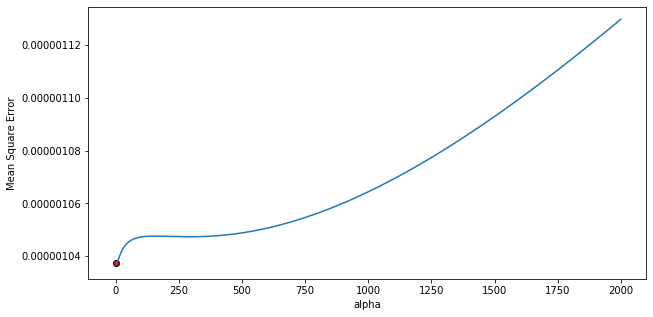

Optimized alpha :  3
Minimal mean square error : 1.1297436927015907e-06


In [57]:
# Which alpha is optimal ?

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(train_mse)
ax.scatter([alpha_min], [min_mse], edgecolors=(0, 0, 0), color = 'r')
ax.set_xlabel('alpha')
ax.set_ylabel('Mean Square Error')
plt.show()
print("Optimized alpha : ", alpha_min)
print("Minimal mean square error :", mean_squared_error(y_train, predicted_r))

In [58]:
# finally we do the regression with the chosen alpha and take a look at the coefficient
        
ridge = Ridge(alpha=alpha_min)
predicted_r = cross_val_predict(ridge, X_train, y_train, cv=5)

ridge.fit(X_train, y_train)

ridge.coef_

array([ 1.84508846e-04, -7.05133758e-05, -2.80344618e-04, -6.41056991e-06])

If we recapitulate, temperature has a positive influence, and rain, snow, and wind a negative one, as expected.
The major influence is given by snow, as it is the max absolute value among the coefficient.
However we must keep in mind that this is only valid by day of high wind (> 31 km/h)

We'll do further analysis, considering only the first three columns from years 2016, because the snow column doesn't seem to be valid before this.

In [86]:
Second_regression = total_dataset_beyond2016[['Date','Mean temp (°C)','Tot precip (mm)','Snow on ground (cm)',
                                   'normalized_count']]

Second_regression.head()

,Date,Mean temp (°C),Tot precip (mm),Snow on ground (cm),normalized_count
825,2016-04-15,7.0,0.0,0.0,0.002372
826,2016-04-16,8.3,0.0,0.0,0.002751
827,2016-04-17,13.8,0.0,0.0,0.003406
828,2016-04-18,9.2,10.9,0.0,0.001469
829,2016-04-19,9.0,0.0,0.0,0.003128


In [61]:
parameters = ['normalized_count', 'Mean temp (°C)','Tot precip (mm)', 'Snow on ground (cm)']
y = Second_regression[parameters[0]]
X = Second_regression[parameters[1:]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Normalisation

X = scale(X, axis = 0)

In [62]:
# find the alpha for which mse (mean square error) is minimal

train_mse = [] # will contain mse value for each alpha in (0:2000)

# alpha = 0

ridge = Ridge(alpha=0)  #creation of the model
predicted_r = cross_val_predict(ridge, X_train, y_train, cv=5)
alpha_min = 0  #initialize alpha_min
min_mse = mean_squared_error(y_train, predicted_r)  #initialize min_mse
train_mse.append(min_mse)

# alpha in (1:2000)

for alpha_i in range(1, 2000):
    ridge = Ridge(alpha=alpha_i)
    predicted_r = cross_val_predict(ridge, X_train, y_train, cv=5)
    mse_i = mean_squared_error(y_train, predicted_r)
    train_mse.append(mse_i)    
    if mse_i < min_mse:
        alpha_min = alpha_i
        min_mse = mse_i

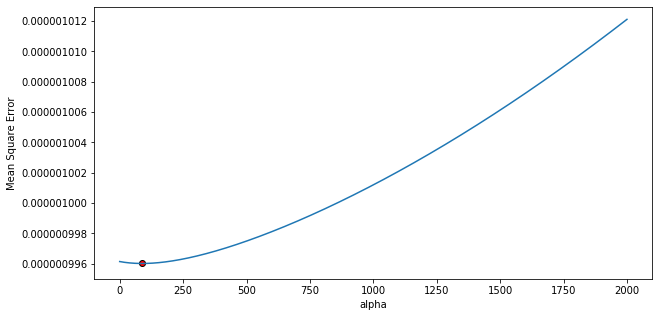

Optimized alpha :  88
Minimal mean square error : 1.0121178670989611e-06


In [63]:
# Which alpha is optimal ?

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(train_mse)
ax.scatter([alpha_min], [min_mse], edgecolors=(0, 0, 0), color = 'r')
ax.set_xlabel('alpha')
ax.set_ylabel('Mean Square Error')
plt.show()
print("Optimized alpha : ", alpha_min)
print("Minimal mean square error :", mean_squared_error(y_train, predicted_r))

In [64]:
# finally we do the regression with the chosen alpha and take a look at the coefficient
        
ridge = Ridge(alpha=alpha_min)
predicted_r = cross_val_predict(ridge, X_train, y_train, cv=5)

ridge.fit(X_train, y_train)

ridge.coef_

array([ 1.74744843e-04, -8.23345150e-05, -7.39778045e-05])

Once again, temperature is a positiv factor and rain and snow are negative ones.
This time temperature is the principal factor in Montreal that will make you decide whether or not you will use the public bike.

There is no need cutting further this dataset to do a Ridge regression.
We will do individual analysis of each parameters.

# Influence of individuals parameters

## Influence of Temperature

In [65]:
total_dataset.head()

,Date,Mean temp (°C),Tot precip (mm),Snow on ground (cm),Wind max speed (km/h),normalized_count
94,2014-04-15,5.7,13.6,0.0,33.0,0.000503
95,2014-04-16,-3.5,0.0,0.0,33.0,0.001014
96,2014-04-17,2.6,0.0,0.0,NaN,0.001866
97,2014-04-18,6.3,0.0,0.0,NaN,0.001698
98,2014-04-19,7.2,1.0,0.0,35.0,0.001923


In [66]:
Temp_dataset = total_dataset[['Date','Mean temp (°C)','normalized_count']]

# simplest operation found to have only one temperature conrresponding to one number of bike
Temp_dataset = Temp_dataset.drop_duplicates(subset = ['Mean temp (°C)'])

Temp_dataset.head()

,Date,Mean temp (°C),normalized_count
94,2014-04-15,5.7,0.000503
95,2014-04-16,-3.5,0.001014
96,2014-04-17,2.6,0.001866
97,2014-04-18,6.3,0.001698
98,2014-04-19,7.2,0.001923


(0, 0.008)

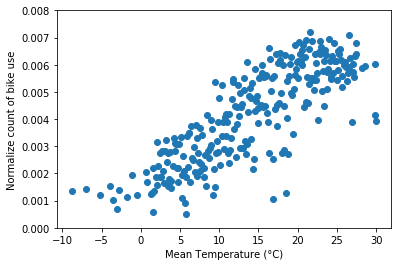

In [74]:
plt.scatter(Temp_dataset['Mean temp (°C)'],Temp_dataset['normalized_count'])

axes = plt.gca()
axes.set_xlabel('Mean Temperature (°C)')
axes.set_ylabel('Normalize count of bike use')
axes.set_ylim(0, 0.008)

# plusieurs pb : points qui se superposent, limite des axes, méthode d'obtention de ces points
# on peut voir une tendence...
# j'aimerai bien voir sambiak pour qu'il me file un coup de main
# J'peux aussi regarder dans le cours pour faire des Parsons correlation ou whatever
# et commencer à faire le jekyll
# jfinis juste ça, je clean tout et je fais le jekyll

A clear influence can be seen.

## Influence of Rain

In [75]:
Rain_dataset = total_dataset[['Date','Tot precip (mm)','normalized_count']]

# simplest operation found to have only one temperature conrresponding to one number of bike
Rain_dataset = Rain_dataset.drop_duplicates(subset = ['Tot precip (mm)'])

Rain_dataset.head()

,Date,Tot precip (mm),normalized_count
94,2014-04-15,13.6,0.000503
95,2014-04-16,0.0,0.001014
98,2014-04-19,1.0,0.001923
101,2014-04-22,11.0,0.001508
106,2014-04-27,1.4,0.001882


(0, 0.008)

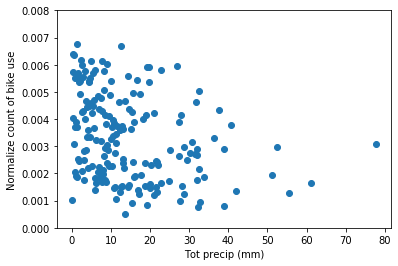

In [78]:
plt.scatter(Rain_dataset['Tot precip (mm)'],Rain_dataset['normalized_count'])

axes = plt.gca()
axes.set_xlabel('Tot precip (mm)')
axes.set_ylabel('Normalize count of bike use')
axes.set_ylim(0, 0.008)

Hard to draw a conclusion from it as it is.

## Influence of Snow

In [87]:
Snow_dataset = total_dataset_beyond2016[['Date','Snow on ground (cm)','normalized_count']]

# simplest operation found to have only one temperature conrresponding to one number of bike
Snow_dataset = Snow_dataset.drop_duplicates(subset = ['Snow on ground (cm)'])

Snow_dataset.head()

,Date,Snow on ground (cm),normalized_count
825,2016-04-15,0.0,0.002372
1018,2016-10-25,NaN,0.003105
1550,2018-04-10,24.0,0.000580
1551,2018-04-11,20.0,0.001819
1552,2018-04-12,16.0,0.001821


(0, 0.008)

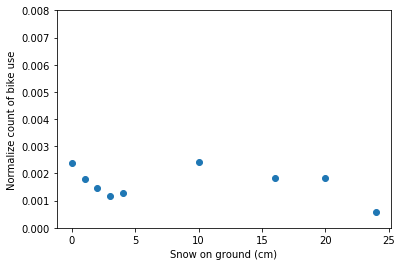

In [88]:
plt.scatter(Snow_dataset['Snow on ground (cm)'],Snow_dataset['normalized_count'])

axes = plt.gca()
axes.set_xlabel('Snow on ground (cm)')
axes.set_ylabel('Normalize count of bike use')
axes.set_ylim(0, 0.008)

In [ ]:
# j'ai seulement 3 points... y'a aucun intérêt à ce truc
# moins y'a de points, plus de moyennes doivent être faites

## Influence of Wind

In [81]:
Wind_dataset = total_dataset[['Date','Wind max speed (km/h)','normalized_count']]

# simplest operation found to have only one temperature conrresponding to one number of bike
Wind_dataset = Wind_dataset.drop_duplicates(subset = ['Wind max speed (km/h)'])

Wind_dataset.head()

,Date,Wind max speed (km/h),normalized_count
94,2014-04-15,33.0,0.000503
96,2014-04-17,NaN,0.001866
98,2014-04-19,35.0,0.001923
102,2014-04-23,41.0,0.002750
111,2014-05-02,39.0,0.003941


(0, 0.008)

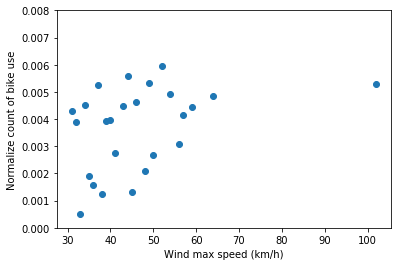

In [82]:
plt.scatter(Wind_dataset['Wind max speed (km/h)'],Wind_dataset['normalized_count'])

axes = plt.gca()
axes.set_xlabel('Wind max speed (km/h)')
axes.set_ylabel('Normalize count of bike use')
axes.set_ylim(0, 0.008)

# Sketch of stuff

In [ ]:
# Maybe I should use dataset cleaned of "false travel"
# Maybe I should not use 2019 data, as it is not a finished year (?)